In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [17]:
def polynomial(x, coeffs):
    return sum([coeffs[i] * x ** i for i in range(len(coeffs))])

In [18]:
random.seed(788886)

coeff_10= [random.uniform(-1,1) for i in range(11)]
coeff_50= [random.uniform(-1,1) for i in range(51)]
x = np.array([random.uniform(-1,1) for i in range(15)])

test_x=np.array([random.uniform(-1,1) for i in range(100)])
polynomial_10 = polynomial(x, coeff_10)+np.random.normal(0,0.3,len(x))
test_polynomial_10 = polynomial(test_x, coeff_10)

polynomial_50 = polynomial(x, coeff_50)
test_polynomial_50 = polynomial(test_x, coeff_50)

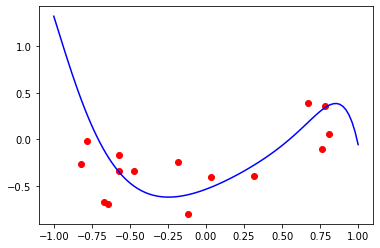

In [19]:
c=np.linspace(-1,1,100)
plt.plot(c, polynomial(c,coeff_10) , 'b')
plt.scatter(x, polynomial_10, color='r')
plt.show()

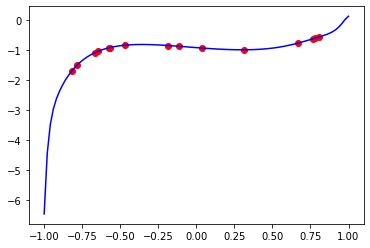

In [20]:
c=np.linspace(-1,1,100)
plt.plot(c, polynomial(c,coeff_50) , 'b')
plt.scatter(x, polynomial_50, color='r')
plt.show()

In [22]:
x = x[:, np.newaxis]
polynomial_10 = polynomial_10[:, np.newaxis]
polynomial_features_10= PolynomialFeatures(degree=10)
x_poly_10 = polynomial_features_10.fit_transform(x)

model_10 = LinearRegression()
model_10.fit(x_poly_10, polynomial_10)
y_poly_10_pred = model_10.predict(x_poly_10)


In [23]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly_2 = polynomial_features_2.fit_transform(x)

model_2 = LinearRegression()
model_2.fit(x_poly_2, polynomial_10)
y_poly_2_pred = model_2.predict(x_poly_2)

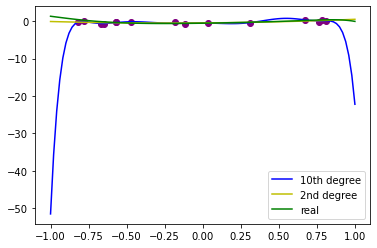

In [25]:
c=np.linspace(-1,1,100)
c=c[:, np.newaxis]
c_poly_2 = polynomial_features_2.fit_transform(c)
c_poly_10 = polynomial_features_10.fit_transform(c)
plt.plot(c, model_10.predict(c_poly_10) , 'b',label='10th degree')
plt.plot(c, model_2.predict(c_poly_2) , 'y',label='2nd degree')
plt.plot(c, polynomial(c,coeff_10) , 'g', label='real')
# plt.plot(c, polynomial(c,w) , 'r', label='linear regression')
plt.scatter(x, polynomial_10, color='purple')
plt.legend()
plt.show()

In [26]:
E_in_10=np.mean((polynomial_10-y_poly_10_pred)**2)
E_in_2=np.mean((polynomial_10-y_poly_2_pred)**2)
test_x=test_x[:, np.newaxis]
x_test_poly_10 = polynomial_features_10.fit_transform(test_x)
x_test_poly_2 = polynomial_features_2.fit_transform(test_x)
E_out_10=np.mean((test_polynomial_10-model_10.predict(x_test_poly_10))**2)
E_out_2=np.mean((test_polynomial_10-model_2.predict(x_test_poly_2))**2)
a=[['','2nd degree','10th degree'],['E_in',E_in_2,E_in_10],['E_out',E_out_2,E_out_10]]
print(tabulate(a))

-----  -------------------  -------------------
       2nd degree           10th degree
E_in   0.05093020906838817  0.02593154639929781
E_out  0.319200795125698    65.23851463787814
-----  -------------------  -------------------


In [27]:
polynomial_50 = polynomial_50[:, np.newaxis]
polynomial_features_10= PolynomialFeatures(degree=10)
x_poly_10 = polynomial_features_10.fit_transform(x)

model_10 = LinearRegression()
model_10.fit(x_poly_10, polynomial_50)
y_poly_10_pred = model_10.predict(x_poly_10)

In [28]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly_2 = polynomial_features_2.fit_transform(x)

model_2 = LinearRegression()
model_2.fit(x_poly_2, polynomial_50)
y_poly_2_pred = model_2.predict(x_poly_2)

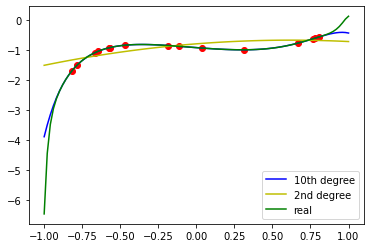

In [29]:
c=np.linspace(-1,1,100)
c=c[:, np.newaxis]
c_poly_2 = polynomial_features_2.fit_transform(c)
c_poly_10 = polynomial_features_10.fit_transform(c)
plt.plot(c, model_10.predict(c_poly_10) , 'b',label='10th degree')
plt.plot(c, model_2.predict(c_poly_2) , 'y',label='2nd degree')
plt.plot(c, polynomial(c,coeff_50) , 'g', label='real')
plt.scatter(x, polynomial_50, color='r')
plt.legend()
plt.show()

In [30]:
E_in_10=np.mean((polynomial_50-y_poly_10_pred)**2)
E_in_2=np.mean((polynomial_50-y_poly_2_pred)**2)
E_out_10=np.mean((test_polynomial_50-model_10.predict(x_test_poly_10))**2)
E_out_2=np.mean((test_polynomial_50-model_2.predict(x_test_poly_2))**2)
a=[['','2nd degree','10th degree'],['E_in',E_in_2,E_in_10],['E_out',E_out_2,E_out_10]]
print(tabulate(a))

-----  --------------------  ----------------------
       2nd degree            10th degree
E_in   0.032009909665257644  3.7525523357241135e-09
E_out  0.8994906761509471    1.2274478976781364
-----  --------------------  ----------------------
